In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure
import matplotlib
import webcolors
from webcolors import *

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 20)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  3.213978289678509
Iteration  10 : error is  11.623927260647703
Iteration  20 : error is  11.893258172583042
Iteration  30 : error is  11.58121379927935
Iteration  40 : error is  12.450684301601198
Iteration  50 : error is  12.251772935164956
Iteration  60 : error is  12.307281857696662
Iteration  70 : error is  12.132889241098495
Iteration  80 : error is  11.230901087007782
Iteration  90 : error is  12.442141852394396
Iteration  100 : error is  12.545958330201556
Iteration  110 : error is  1.6089081812437345
Iteration  120 : error is  1.3506081745637732
Iteration  130 : error is  1.052052687384383
Iteration  140 : error is  0.8438519213214295
Iteration  150 : error is  0.6919228578745843
Iteration  160 : error is  0.6269926491406554
Iteration  170 : error is  0.5789579612452769
Iteration  180 : error is  0.5387778589516643
Iteration  190 : error is  0.5

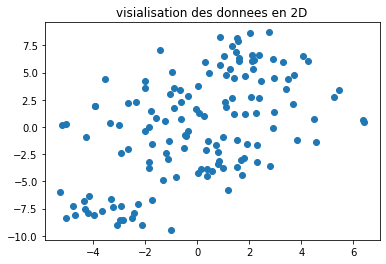

In [3]:
#construction du graphe pour visualiser les données 2D
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')
plt.title("visialisation des donnees en 2D")
plt.savefig('../Data/Graphes/visialisation_des_donne_en_2D.png',dpi=200)
plt.show()

In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer et choix du clustering qui fait le plus de sens------#

#on choisi k=5 clustering
k=5

cluster_classe = {} # vas stocker les ID de claque cluster avec la liste des pays appartenant a chaque cluster
for i in range(0,k):
    cluster_classe[i] = []

k=5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_2D)

#pour chaque cluster, je stocke la liste des pays associé
for i in range(0, len(kmeans.labels_) ):
    cp_liste=[]
    key=kmeans.labels_[i]
    cp_liste = cluster_classe[key]
    cp_liste.append(country_names[i])
    cluster_classe[key] = cp_liste

print("\n","#"*32,"Nombre de cluster= ", k, "#"*33, "\n|"," "*85,"|")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

li = 109
with open('../Data/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'w') as fichier:
    fichier.write(' '*8 +'Repartition des pays dans '+str(k)+' cluster \n\n+'+"-"*li +"+\n")
    fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
        

#on affiche les centroïdes de chaque cluster + le code de couleur associer
for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
        
    colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], k) )
    color_RGB= hex_to_rgb (colore_hex)
    
    #'get_colour_name' donne une approximation du nom de couleur la plus proche de celle sur l'image
    actual_name, colore_name = get_colour_name(color_RGB)
    
    with open('../Data/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'a') as fichier:
        fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        
    print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    


 ################################ Nombre de cluster=  5 ################################# 
|                                                                                       |
|               Netherlands -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                     Niger -> centroïdes associer au Cluter N*: 2 color=( dodgerblue)  |
|                    Latvia -> centroïdes associer au Cluter N*: 3 color=(  turquoise)  |
|                     Chile -> centroïdes associer au Cluter N*: 4 color=(greenyellow)  |
|                    Turkey -> centroïdes associer au Cluter N*: 5 color=(  orangered)  |


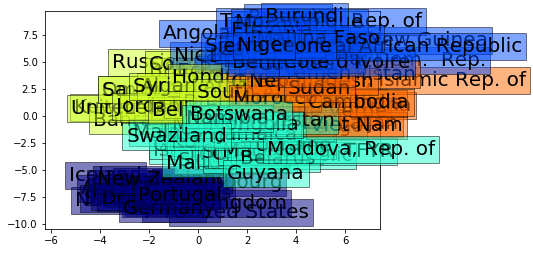

In [5]:
#----task_1.2 : graphe réduit pour visualiser sur l'écran d'ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)
plt.savefig('../Data/Graphes/visialisation_des_donne_pour_k_fixer_a_4.png',dpi=200)


 ################################## __pour k =  2 __ #################################### 
|                                                                                       |
|                     Benin -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                    Israel -> centroïdes associer au Cluter N*: 2 color=( lightgreen)  |

 ################################## __pour k =  3 __ #################################### 
|                                                                                       |
|                   Austria -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|   Lao People's Dem.  Rep. -> centroïdes associer au Cluter N*: 2 color=(deepskyblue)  |
|                      Fiji -> centroïdes associer au Cluter N*: 3 color=(       gold)  |

 ################################## __pour k =  4 __ #################################### 
|                                                                                       |
|   

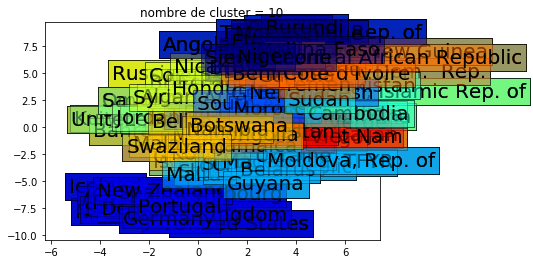

In [6]:
#-------task_2 :regrouper des données HDR avec l'algorithme k-means pour k = [2,10]. 
x,y =data_scaled.shape
precision=0.5 # elle permet de defini une plage de valeur comprise entre [value-precision ; value+precision]

SSE = []
for cluster in range(2,11):
    # vas stocker les ID de claque cluster avec la liste des noms de pays appartenant a chaque cluster
    #cluster_classe[N*_cluster][index_pays] :retourne le nom du pays appartenant a ce cluster
    cluster_classe = {}
    clusterID_pays = {}
    for i in range(0,cluster):
        cluster_classe[i] = []
        clusterID_pays[i] = []
        
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
     
    #pour chaque cluster, je stocke la liste des pays associé
    for i in range(0, len(kmeans.labels_) ):
        key=kmeans.labels_[i]
        cp_liste=[]
        cp_liste = cluster_classe[key]
        cp_liste.append(country_names[i])
        cluster_classe[key] = cp_liste
        ID_liste=[] 
        ID_liste = clusterID_pays[key] 
        ID_liste.append(i) 
        clusterID_pays[key] = ID_liste 
       
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    print("\n","#"*34,"__pour k = ", cluster,"__", "#"*36, "\n|"," "*85,"|")
    plt.savefig('../Data/Graphes/'+str(cluster)+'_Means.png',dpi=200)
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    
    li = 109
    with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'w') as fichier:
        fichier.write(' '*8 +'Tableau_1: Repartition des pays dans '+str(cluster)+' cluster \n\n+'+"-"*li +"+\n")
        fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
            
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        
        #je determine le nom de la couleur assicier a chaque cluster
        colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], cluster) )
        color_RGB= hex_to_rgb (colore_hex)
        actual_name, colore_name = get_colour_name(color_RGB)
        
        #je souvegarde la liste des pays par cluster dans un fichier .txt
        with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
            fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    
    stat = {}
    stat2 = {}
    li= 27+(19*cluster)
    #AllStat[index_caracteristique][N*_cluster] : retourne 
    #le nombre de pays dans ce cluster qui ont approximativement la meme valeur la caracteristique
    AllStat={}
    AllStat2 = {}
    for i in range(0,y):
        AllStat[i] = []
        AllStat2[i] = [[0] * 1] * cluster
        
    for i in range(0, len(clusterID_pays) ): #pour chaque cluster
        premier= clusterID_pays[i][0]
        valeur = data_scaled[premier]
        for j in range(0, y):#pour chaque caracteristique
            index =0
            index2 =[] #va contenir la liste des valeur d'une caracteristique pour tous les pays du meme cluster
            for k in range(0, len(clusterID_pays[i]) ): #pour chaque pays
                pays=clusterID_pays[i][k]
                index2.append(data_scaled[pays][j]) #### ajoute recent#####
                if (data_scaled[pays][j]>=valeur[j]-precision) and (data_scaled[pays][j]<=valeur[j]+precision):
                    index=index+1
        
            stat[j]=index
            stat2[j]=index2 
            
        for m in range(0, len(stat) ): #pour chaque ligne contenant le nombre approxi de pays
            car_liste=[]
            car_liste = AllStat[m]
            car_liste.append(stat[m])
            AllStat2[m][i]= stat2[m]

    with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
        fichier.write('\n\n'*3 +' '*8 +'Tableau_2: estimation du niveau de proximiter entre les pays en fonction des caractiristique   \n\n+'+"-"*li +"+\n")
        fichier.write("|indicator_names "+" "*11 +"| Nombre de pays/cluster ayant des valeur \n| "+" "*26 +"|  de caracteristique proche \n+" +"-"*li +"+" )
        fichier.write("\n|" +" "*27 + "| Cluster_ID" +" "*(li-39) +"| \n|" +"-"*li +"+ \n|"+" "*27)
        for i in range(0, len(clusterID_pays)):
            fichier.write("|%17s " % (i+1))
        fichier.write("|\n#" +"#"*li +"#")

        for m in range(0, len(AllStat) ):
            fichier.write("\n|%2s %23s " % (m,hdr_data['indicator_names'][m]))
            for i in range(0, cluster):
                fichier.write("|%3s [%5s;%5s] " % (AllStat[m][i], round(min(AllStat2[m][i]),2), round(max(AllStat2[m][i]),2) ))
            fichier.write("|\n+" +"-"*li +"+")

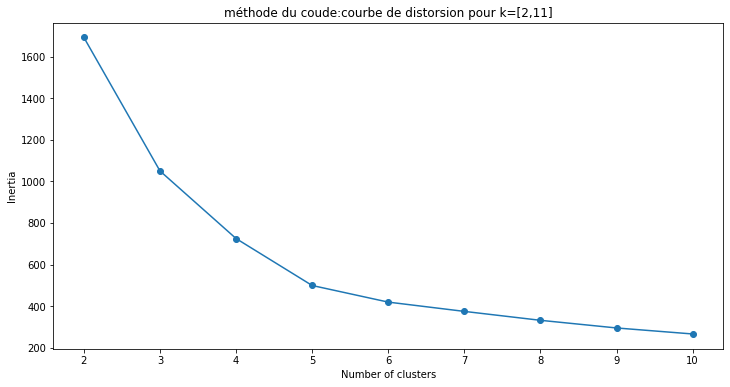

In [7]:
# affiche les résultats stocker dans la variable SSE en fonction de K
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("méthode du coude:courbe de distorsion pour k=[2,11]")
plt.savefig('../Data/Graphes/methode_du_coude_courbe_de_distorsion.png',dpi=200)

In [8]:
for i in range(0, len(hdr_data["indicator_descriptions"]) ): 
    print("%2s - %s" %(i, hdr_data["indicator_descriptions"][i] ))

 0 - annual population growth rate (%%) 1975-2004
 1 - annual population growth rate (%%) 2004
 2 - average annual change in consumer price index (%%) 1990-2004
 3 - CO2 emissions - per capita (mertic ton) 2003
 4 - export of goods and services (%% of GDP) 1990
 5 - export of goods and services (%% of GDP) 2004
 6 - electricity comsumption per capita (kW/h) 2003
 7 - GDP (US$ billions) 2004
 8 - GDP (PPP US$ billions) 2004
 9 - GDP per capita (US$) 2004
10 - GDP per capita growth rate (%%) 1990-2004
11 - female economic activity rate (%% age 15 and older) 2004
12 - female economic activity rate (index, 1990=100, %% age 15 and older) 1990
13 - female economic activity rate (index, 1990=100, %% age 15 and older) 2004
14 - health expenditure per capita (PPP US$) 2003
15 - infant with low birth weight (%%) 1996-2004
16 - internet users (per 1,000 people) 1990
17 - import of goods and services (%% of GDP) 1990
18 - import of goods and services (%% of GDP) 2004
19 - gross tertiary enrolment 